In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
ipl=pd.read_csv("players_performace_2008_2023.csv")
ipl.head()

,Player,Matches,innings_bat,Runs,Balls_played,Outs,SR,Avg,Centuries,Fifties,Fours,Sixes,innings_bowl,Wickets_taken,Total_balls,Total_runs_given,Economy,Bowling_avg,Bowling_SR
0,RA Jadeja,366,169,2692,2187,108,123.09,24.93,0,2,193,99,197,161,3610,4546,7.56,28.24,22.42
1,KA Pollard,275,168,3437,2447,129,140.46,26.64,0,16,221,224,107,81,1586,2200,8.32,27.16,19.58
2,R Ashwin,275,81,714,622,53,114.79,13.47,0,1,56,24,194,189,4333,4966,6.88,26.28,22.93
3,RG Sharma,269,237,6213,4890,219,127.06,28.37,1,42,554,258,32,16,349,462,7.94,28.88,21.81
4,SK Raina,269,200,5536,4177,168,132.54,32.95,1,39,506,204,69,30,930,1139,7.35,37.97,31.00


In [3]:
col = ['innings_bowl', 'Wickets_taken', 'Total_balls', 'Total_runs_given', 'Economy', 'Bowling_avg', 'Bowling_SR']

# Dropping the specified columns
ipl1=ipl.drop(columns=col)
ipl1.head(10)

,Player,Matches,innings_bat,Runs,Balls_played,Outs,SR,Avg,Centuries,Fifties,Fours,Sixes
0,RA Jadeja,366,169,2692,2187,108,123.09,24.93,0,2,193,99
1,KA Pollard,275,168,3437,2447,129,140.46,26.64,0,16,221,224
2,R Ashwin,275,81,714,622,53,114.79,13.47,0,1,56,24
3,RG Sharma,269,237,6213,4890,219,127.06,28.37,1,42,554,258
4,SK Raina,269,200,5536,4177,168,132.54,32.95,1,39,506,204
5,DJ Bravo,268,110,1560,1247,69,125.10,22.61,0,5,120,66
6,PP Chawla,260,80,609,565,53,107.79,11.49,0,0,55,19
7,V Kohli,255,229,7273,5739,205,126.73,35.48,7,51,646,235
8,SP Narine,253,92,1046,692,71,151.16,14.73,0,4,114,64
9,Harbhajan Singh,248,88,833,636,56,130.97,14.88,0,1,79,42


In [ ]:
# Select only numeric variables
numeric_ipl1 = ipl1.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_ipl1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

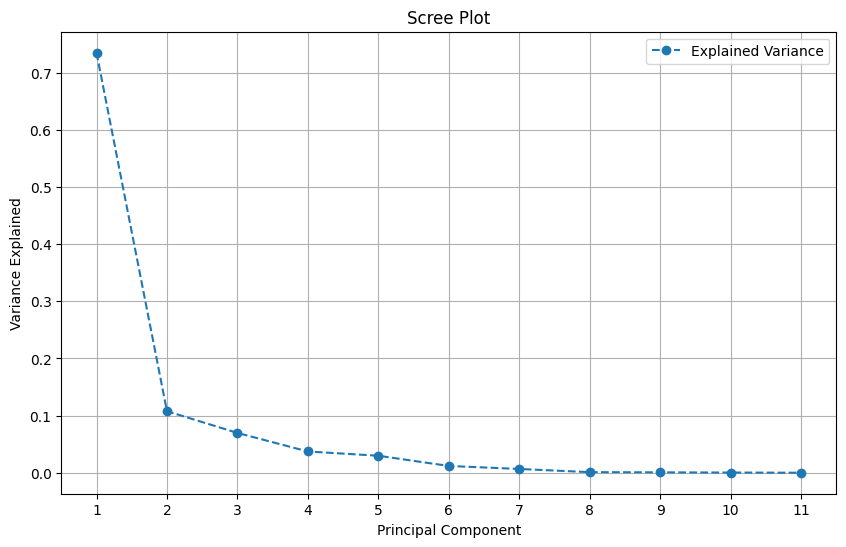

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ipl1 is already loaded in your environment
# Dropping the 'Player' column for PCA
df_numeric = ipl1.drop(columns=['Player'])

# Standardize the data
df_standardized = (df_numeric - df_numeric.mean()) / df_numeric.std()

# Compute the covariance matrix
cov_matrix = np.cov(df_standardized.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Compute the explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Compute the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Compute the first principal component
pc1 = np.dot(df_standardized, sorted_eigenvectors[:, 0])

# Add the Player column to the principal component DataFrame
principal_components_df = pd.DataFrame({'Player': ipl1['Player'], 'PC1': pc1})

# Create a DataFrame for players, standardized values, and the first principal component
standardized_values_with_pc1_df = df_standardized.copy()
standardized_values_with_pc1_df['Player'] = ipl1['Player']
standardized_values_with_pc1_df['PC1'] = pc1

# Reorder columns to have Player first
standardized_values_with_pc1_df = standardized_values_with_pc1_df[['Player'] + list(df_standardized.columns) + ['PC1']]

eigenvectors_df = pd.DataFrame(sorted_eigenvectors, 
                               index=df_numeric.columns, 
                               columns=[f'PC{i+1}' for i in range(len(df_numeric.columns))])

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Explained Variance')
#plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.show()


In [37]:
eigenvectors_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Matches,-0.264267,0.111861,0.590109,-0.377430,0.502237,-0.180963,0.337755,0.088581,-0.082542,-0.110558,0.031886
innings_bat,-0.339258,0.071526,0.256010,0.007820,0.008847,0.002920,-0.358234,-0.385160,0.143749,0.690114,-0.201243
Runs,-0.348335,0.075249,-0.034278,0.102162,-0.127316,0.021130,-0.029192,-0.187013,-0.356892,0.029458,0.825025
Balls_played,-0.346586,0.083891,-0.012645,0.138436,-0.129483,-0.114145,-0.114679,-0.396273,-0.445884,-0.495124,-0.457796
Outs,-0.342798,0.078206,0.160316,0.055526,-0.104070,-0.042406,-0.435629,0.186361,0.625371,-0.444968,0.146188
SR,-0.139472,-0.764478,0.117828,-0.441468,-0.425255,-0.064982,0.039743,-0.016019,-0.019187,-0.007735,-0.003807
Avg,-0.209569,-0.594310,-0.142374,0.501897,0.573814,0.001153,-0.006818,0.012995,0.034562,-0.003985,0.003977
Centuries,-0.238578,0.087105,-0.691282,-0.558722,0.316619,-0.136989,-0.143217,-0.047318,0.057496,0.018095,-0.007409
Fifties,-0.330278,0.099654,-0.201215,0.185191,-0.240018,-0.157197,0.716843,-0.186564,0.408913,0.070254,-0.055387
Fours,-0.342000,0.082229,-0.074433,0.153616,-0.189245,-0.320516,-0.048047,0.733652,-0.282515,0.249271,-0.161516


In [22]:
# Get the current working directory
current_directory = os.getcwd()
# Define the file name
file_name = "eigen vectors bat.csv"
# Save the DataFrame to a CSV file in the current directory
eigenvectors_df.to_csv(os.path.join(current_directory, file_name), index=False)

In [19]:
merged_df = pd.merge(principal_components_df, standardized_values_with_pc1_df, on='Player')

# Print the merged DataFrame
merged_df_sorted = merged_df.sort_values(by='PC1_y', ascending=True)
merged_df_sorted 

,Player,PC1_x,Matches,innings_bat,Runs,Balls_played,Outs,SR,Avg,Centuries,Fifties,Fours,Sixes,PC1_y
7,V Kohli,-18.845819,3.794134,5.329787,6.694086,6.833322,5.718635,0.667745,1.748375,11.193435,7.155586,6.293878,5.217778,-18.845819
29,DA Warner,-16.124042,2.398892,3.950659,5.832883,5.532039,4.212570,0.903623,2.232463,6.300788,8.629748,6.293878,5.000865,-16.124042
13,S Dhawan,-15.682937,3.203839,4.991510,6.047691,6.347255,5.226859,0.581850,1.707306,3.039023,7.008170,7.380193,3.145045,-15.682937
3,RG Sharma,-15.344175,4.044562,5.537957,5.649606,5.750195,6.148939,0.676520,1.127099,1.408140,5.828841,5.332908,5.772114,-15.344175
28,CH Gayle,-14.082294,2.434667,3.039914,4.451411,3.997291,3.351962,1.077008,2.059449,9.562553,4.354679,3.807889,8.206371,-14.082294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,L Ablish,2.057071,-0.695683,-0.603065,-0.472424,-0.485755,-0.582247,-2.702361,-1.351889,-0.222742,-0.362639,-0.453806,-0.446087,2.057071
625,JL Denly,2.061158,-0.749347,-0.603065,-0.472424,-0.487031,-0.551511,-2.702361,-1.351889,-0.222742,-0.362639,-0.453806,-0.446087,2.061158
583,Y Prithvi Raj,2.062240,-0.713571,-0.603065,-0.472424,-0.487031,-0.582247,-2.702361,-1.351889,-0.222742,-0.362639,-0.453806,-0.446087,2.062240
590,Abdur Razzak,2.066525,-0.731459,-0.603065,-0.472424,-0.485755,-0.582247,-2.702361,-1.351889,-0.222742,-0.362639,-0.453806,-0.446087,2.066525


In [20]:
# Get the current working directory
current_directory = os.getcwd()
# Define the file name
file_name = "new batsman ranking.csv"
# Save the DataFrame to a CSV file in the current directory
merged_df_sorted.to_csv(os.path.join(current_directory, file_name), index=False)

In [13]:
# Create a DataFrame to merge the eigenvalues, explained variance ratio, and cumulative explained variance ratio
pca_summary_df = pd.DataFrame({
    'Eigenvalue': sorted_eigenvalues,
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance
})

# Print the merged DataFrame
summary=pca_summary_df.T
summary

,0,1,2,3,4,5,6,7,8,9,10
Eigenvalue,8.084544,1.184836,0.766418,0.409291,0.327379,0.130860,0.072968,0.011683,0.007537,0.003950,0.000533
Explained Variance Ratio,0.734959,0.107712,0.069674,0.037208,0.029762,0.011896,0.006633,0.001062,0.000685,0.000359,0.000048
Cumulative Explained Variance,0.734959,0.842671,0.912345,0.949554,0.979315,0.991212,0.997845,0.998907,0.999592,0.999952,1.000000


In [14]:
# Get the current working directory
current_directory = os.getcwd()
# Define the file name
file_name = "pca summary.csv"
# Save the DataFrame to a CSV file in the current directory
summary.to_csv(os.path.join(current_directory, file_name), index=False)

In [25]:
col2=['innings_bat', 'Runs', 'Balls_played', 'Outs', 'SR', 'Avg',
       'Centuries', 'Fifties', 'Fours', 'Sixes',]
ipl2=ipl.drop(columns=col2)
ipl2

,Player,Matches,innings_bowl,Wickets_taken,Total_balls,Total_runs_given,Economy,Bowling_avg,Bowling_SR
0,RA Jadeja,366,197,161,3610,4546,7.56,28.24,22.42
1,KA Pollard,275,107,81,1586,2200,8.32,27.16,19.58
2,R Ashwin,275,194,189,4333,4966,6.88,26.28,22.93
3,RG Sharma,269,32,16,349,462,7.94,28.88,21.81
4,SK Raina,269,69,30,930,1139,7.35,37.97,31.00
...,...,...,...,...,...,...,...,...,...
632,SS Shaikh,1,0,0,0,0,0.00,0.00,0.00
633,U Kaul,1,0,0,0,0,0.00,0.00,0.00
634,UA Birla,1,0,0,0,0,0.00,0.00,0.00
635,X Thalaivan Sargunam,1,0,0,0,0,0.00,0.00,0.00


In [ ]:
# Select only numeric variables
numeric_ipl2 = ipl2.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_ipl2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

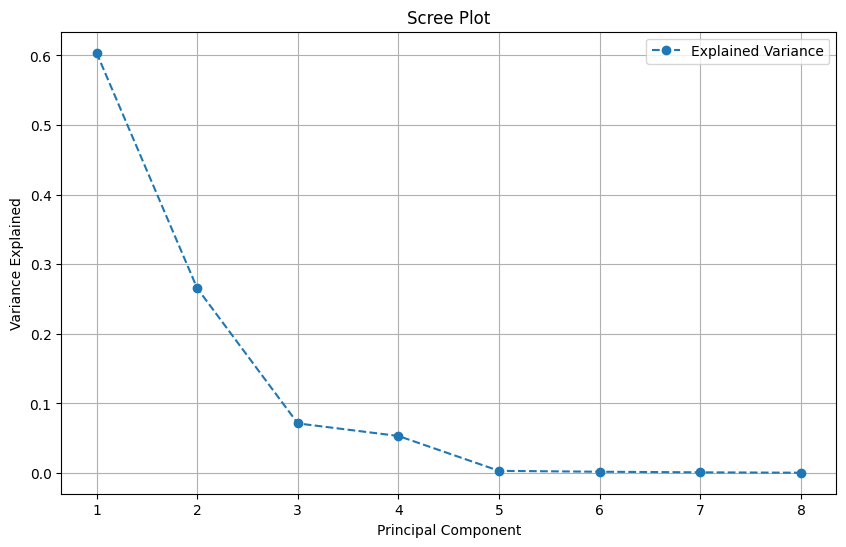

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ipl1 is already loaded in your environment
# Dropping the 'Player' column for PCA
df_numeric1 = ipl2.drop(columns=['Player'])

# Standardize the data
df_standardized1 = (df_numeric1 - df_numeric1.mean()) / df_numeric1.std()

# Compute the covariance matrix
cov_matrix1 = np.cov(df_standardized1.T)

# Compute eigenvalues and eigenvectors
eigenvalues1, eigenvectors1 = np.linalg.eig(cov_matrix1)

# Sort the eigenvalues and eigenvectors
sorted_index1 = np.argsort(eigenvalues1)[::-1]
sorted_eigenvalues1 = eigenvalues1[sorted_index1]
sorted_eigenvectors1 = eigenvectors1[:, sorted_index1]

# Compute the explained variance ratio
explained_variance_ratio1 = sorted_eigenvalues1 / np.sum(sorted_eigenvalues1)

# Compute the cumulative explained variance ratio
cumulative_explained_variance1 = np.cumsum(explained_variance_ratio1)

# Compute the first principal component
pc_1 = np.dot(df_standardized1, sorted_eigenvectors1[:, 0])

# Add the Player column to the principal component DataFrame
principal_components_df1 = pd.DataFrame({'Player': ipl2['Player'], 'PC1': pc_1})

# Create a DataFrame for players, standardized values, and the first principal component
standardized_values_with_pc1_df1 = df_standardized1.copy()
standardized_values_with_pc1_df1['Player'] = ipl2['Player']
standardized_values_with_pc1_df1['PC1'] = pc_1

# Reorder columns to have Player first
standardized_values_with_pc1_df1 = standardized_values_with_pc1_df1[['Player'] + list(df_standardized1.columns) + ['PC1']]

eigenvectors_df1 = pd.DataFrame(sorted_eigenvectors1, 
                               index=df_numeric1.columns, 
                               columns=[f'PC{i+1}' for i in range(len(df_numeric1.columns))])

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio1) + 1), explained_variance_ratio1, marker='o', linestyle='--', label='Explained Variance')
#plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio1) + 1))
plt.legend()
plt.show()


In [33]:
eigenvectors_df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Matches,0.340452,0.192806,0.225146,-0.883235,-0.109372,-0.028433,-0.057863,-0.002189
innings_bowl,0.443965,0.124781,0.000540,0.078461,0.601053,0.122318,0.636343,-0.003187
Wickets_taken,0.430571,0.166065,-0.076717,0.256126,-0.714573,-0.271069,0.362562,-0.001273
Total_balls,0.439308,0.145801,-0.029891,0.207088,0.137341,-0.020052,-0.482963,0.699609
Total_runs_given,0.440693,0.135058,-0.043346,0.205797,0.054522,0.234607,-0.459329,-0.688710
Economy,0.176968,-0.443365,-0.843922,-0.243512,0.008814,-0.018978,-0.010424,0.007828
Bowling_avg,0.192087,-0.595306,0.327176,0.031152,-0.246151,0.643354,0.088114,0.135793
Bowling_SR,0.214894,-0.573775,0.348429,0.051308,0.183456,-0.664112,-0.090331,-0.133069


In [34]:
# Get the current working directory
current_directory = os.getcwd()
# Define the file name
file_name = "eigen vectors ball.csv"
# Save the DataFrame to a CSV file in the current directory
eigenvectors_df1.to_csv(os.path.join(current_directory, file_name), index=False)

In [38]:
merged_df1 = pd.merge(principal_components_df1, standardized_values_with_pc1_df1, on='Player')

# Print the merged DataFrame
merged_df_sorted1 = merged_df1.sort_values(by='PC1_y', ascending=False)
merged_df_sorted1 

,Player,PC1_x,Matches,innings_bowl,Wickets_taken,Total_balls,Total_runs_given,Economy,Bowling_avg,Bowling_SR,PC1_y
2,R Ashwin,11.104352,4.151888,5.570632,4.908207,5.863869,5.207903,0.183593,0.325167,0.643371,11.104352
0,RA Jadeja,10.705384,5.779671,5.665974,4.101659,4.792407,4.718605,0.336405,0.425183,0.605562,10.705384
6,PP Chawla,10.311916,3.883572,5.125704,4.879402,4.896145,5.092568,0.421801,0.305266,0.394277,10.311916
5,DJ Bravo,9.718305,4.026674,4.426531,5.426703,4.327070,4.590455,0.453262,0.077680,0.123684,9.718305
8,SP Narine,9.672185,3.758358,4.521873,4.706570,5.091764,4.427356,0.156626,0.188411,0.496584,9.672185
...,...,...,...,...,...,...,...,...,...,...,...
619,BJ Haddin,-1.912665,-0.749347,-0.594801,-0.535996,-0.557492,-0.577465,-1.362509,-1.015856,-1.056545,-1.912665
618,Abdul Basith,-1.912665,-0.749347,-0.594801,-0.535996,-0.557492,-0.577465,-1.362509,-1.015856,-1.056545,-1.912665
617,AR Bawne,-1.912665,-0.749347,-0.594801,-0.535996,-0.557492,-0.577465,-1.362509,-1.015856,-1.056545,-1.912665
616,A Tomar,-1.912665,-0.749347,-0.594801,-0.535996,-0.557492,-0.577465,-1.362509,-1.015856,-1.056545,-1.912665


In [39]:
# Get the current working directory
current_directory = os.getcwd()
# Define the file name
file_name = "new bowlers ranking.csv"
# Save the DataFrame to a CSV file in the current directory
merged_df_sorted1.to_csv(os.path.join(current_directory, file_name), index=False)

In [41]:
# Create a DataFrame to merge the eigenvalues, explained variance ratio, and cumulative explained variance ratio
pca_summary_df1 = pd.DataFrame({
    'Eigenvalue': sorted_eigenvalues1,
    'Explained Variance Ratio': explained_variance_ratio1,
    'Cumulative Explained Variance': cumulative_explained_variance1
})

# Print the merged DataFrame
summary1=pca_summary_df1.T
summary1

,0,1,2,3,4,5,6,7
Eigenvalue,4.831092,2.124087,0.569965,0.425403,0.024430,0.014426,0.007492,0.003105
Explained Variance Ratio,0.603887,0.265511,0.071246,0.053175,0.003054,0.001803,0.000937,0.000388
Cumulative Explained Variance,0.603887,0.869397,0.940643,0.993818,0.996872,0.998675,0.999612,1.000000


In [42]:
# Get the current working directory
current_directory = os.getcwd()
# Define the file name
file_name = "pca summary ball.csv"
# Save the DataFrame to a CSV file in the current directory
summary1.to_csv(os.path.join(current_directory, file_name), index=False)